<a href="https://colab.research.google.com/github/Jake0925/Function/blob/main/easyocr%EB%A5%BC%ED%86%B5%ED%95%B4LicensePlate%EA%B2%80%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 28 kB/s 
     |████████████████████████████████| 47.6 MB 72 kB/s 


In [3]:
import easyocr
import cv2
import matplotlib.pyplot as plt

In [4]:
reader = easyocr.Reader(['ko', 'en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [ ]:
!wget https://thumb.mt.co.kr/06/2010/02/2010021810110434583_1.jpg -O 01.jpg

--2022-06-25 03:52:22--  https://thumb.mt.co.kr/06/2010/02/2010021810110434583_1.jpg
Resolving thumb.mt.co.kr (thumb.mt.co.kr)... 183.111.246.138
Connecting to thumb.mt.co.kr (thumb.mt.co.kr)|183.111.246.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76170 (74K) [image/jpeg]
Saving to: ‘01.jpg’

01.jpg              100%[===================>]  74.38K   272KB/s    in 0.3s    

2022-06-25 03:52:24 (272 KB/s) - ‘01.jpg’ saved [76170/76170]



In [16]:
# local file upload
from google.colab import files
upLoadFile=files.upload()

Saving test.jfif to test.jfif


# New section

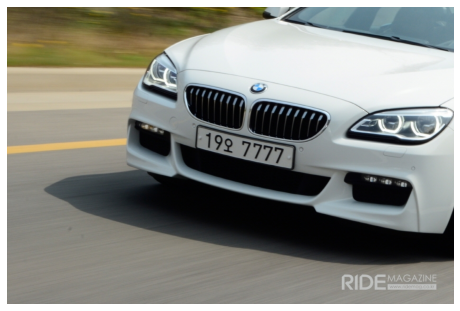

In [17]:
# img_path = '20200513_155319_665.jpg'
img_path = 'test.jfif'

img = cv2.imread(img_path)

plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.show()

In [18]:
result = reader.readtext(img_path)

result

[([[695, 555], [806, 555], [806, 605], [695, 605]],
  "RIDE'",
  0.6966869818344913),
 ([[798, 560], [908, 560], [908, 584], [798, 584]],
  'MAGAZINE',
  0.9952430534545605),
 ([[804, 585], [900, 585], [900, 593], [804, 593]],
  "''' T럽 ] {;",
  0.02559395059893204),
 ([[416.0729607040109, 255.08669173125764],
   [488.7679133256707, 273.4943431603145],
   [475.9270392959891, 317.91330826874236],
   [403.2320866743293, 300.5056568396855]],
  '19오',
  0.4714703787524403),
 ([[493.15046541746176, 272.0726994212783],
   [593.908324794112, 295.0469272244443],
   [581.8495345825382, 339.9273005787217],
   [481.091675205888, 316.9530727755557]],
  '7777',
  0.9242585629132049)]

In [25]:
result[4]

([[493.15046541746176, 272.0726994212783],
  [593.908324794112, 295.0469272244443],
  [581.8495345825382, 339.9273005787217],
  [481.091675205888, 316.9530727755557]],
 '7777',
 0.9242585629132049)

In [26]:
THRESHOLD = 0.5

for bbox, text, conf in result:
  if conf > THRESHOLD:
    print(text)
    cv2.rectangle(img, pt1=bbox[0], pt2=bbox[2], color=(0, 255, 0), thickness=3)

plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.show()

RIDE'
MAGAZINE
7777


error: ignored

In [104]:
import easyocr
import cv2
import matplotlib.pyplot as plt

THRESHOLD = 0.5

reader = easyocr.Reader(['ko', 'en'])

def read(img_path):
    img = cv2.imread(img_path)
    # x = 400
    # y = 100
    # w = 700
    # h = 500
    # img_ori = img[y: y+h, x: x+w] 

    # result = reader.readtext(img_ori)
    result = reader.readtext(img_path)

    r = []

    for bbox, text, conf in result:
        if conf > THRESHOLD:
            r.append(text)
            # cv2.rectangle(img_ori, pt1=(int(bbox[0][0]), int(bbox[0][1])), pt2=(int(bbox[2][0]), int(bbox[2][1])), color=(0, 255, 0), thickness=3)
            cv2.rectangle(img, pt1=(int(bbox[0][0]), int(bbox[0][1])), pt2=(int(bbox[2][0]), int(bbox[2][1])), color=(0, 255, 0), thickness=3)

    print(r)
    plt.figure(figsize=(8, 8))
    # plt.imshow(img_ori[:, :, ::-1])
    plt.imshow(img[:, :, ::-1])
    plt.axis('off')
    plt.show()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [48]:
!wget https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/201707/27/15022a74-97b7-4f5a-8d1e-7c2e2b5f1e7c.jpg -O 02.jpg

--2022-06-27 05:10:03--  https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/201707/27/15022a74-97b7-4f5a-8d1e-7c2e2b5f1e7c.jpg
Resolving pds.joongang.co.kr (pds.joongang.co.kr)... 121.78.73.141, 121.78.33.159
Connecting to pds.joongang.co.kr (pds.joongang.co.kr)|121.78.73.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44416 (43K) [image/jpeg]
Saving to: ‘02.jpg’

02.jpg              100%[===================>]  43.38K  --.-KB/s    in 0.1s    

2022-06-27 05:10:04 (431 KB/s) - ‘02.jpg’ saved [44416/44416]



In [102]:
# local file upload
from google.colab import files
upLoadFile=files.upload()

Saving 10007.jpg to 10007.jpg


["RIDE'", 'MAGAZINE', '7777']


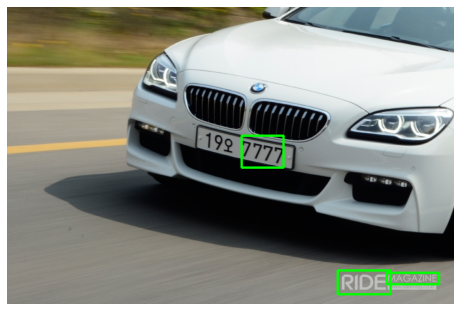

In [105]:
read('test.jfif')

In [ ]:
!wget https://cdn.top-rider.com/news/photo/201803/26900_85378_1532.jpg -O 03.jpg

--2022-06-25 04:02:36--  https://cdn.top-rider.com/news/photo/201803/26900_85378_1532.jpg
Resolving cdn.top-rider.com (cdn.top-rider.com)... 175.126.57.225
Connecting to cdn.top-rider.com (cdn.top-rider.com)|175.126.57.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384491 (375K) [image/jpeg]
Saving to: ‘03.jpg’

03.jpg              100%[===================>] 375.48K   269KB/s    in 1.4s    

2022-06-25 04:02:38 (269 KB/s) - ‘03.jpg’ saved [384491/384491]



['152가3108', '52각 3108', "'152가 3108", '674 8016', '3108', '52단', '3018', '152가']


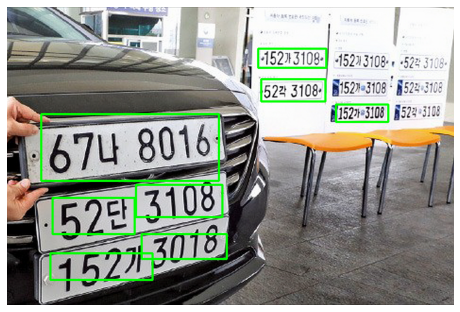

In [ ]:
read('03.jpg')

In [ ]:
!wget https://t1.daumcdn.net/cfile/blog/2654674956415DF21B -O 04.jpg

--2022-06-25 04:04:12--  https://t1.daumcdn.net/cfile/blog/2654674956415DF21B
Resolving t1.daumcdn.net (t1.daumcdn.net)... 23.213.34.159, 23.213.34.160, 2600:1406:4400::170b:d5c4, ...
Connecting to t1.daumcdn.net (t1.daumcdn.net)|23.213.34.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181183 (177K) [image/jpeg]
Saving to: ‘04.jpg’

04.jpg              100%[===================>] 176.94K  --.-KB/s    in 0.09s   

2022-06-25 04:04:12 (1.86 MB/s) - ‘04.jpg’ saved [181183/181183]



['Canadian, USA Passports', 'or Permanent Residents', 'Titulaires de passeport', 'canadien ou americain ou', 'residents permanents', '키나다인 미국 여권 소지자', '또는 영주권자']


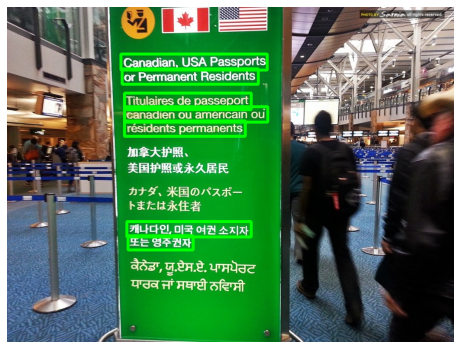

In [ ]:
read('04.jpg')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete['カナダ、米国のパスポー', 'トまたは永住者']


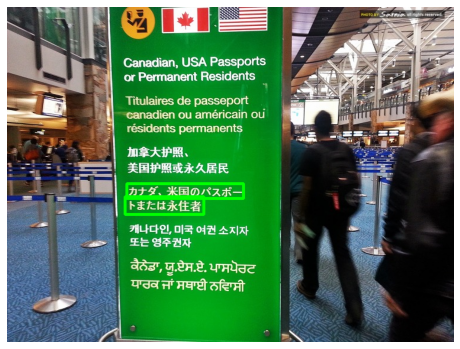

In [ ]:
reader = easyocr.Reader(['ja'])

read('04.jpg')